## Project #3:

* Student name: Milena Afeworki
* Student pace: full time
* Scheduled project review date/time: 07/09/2021 @ 10:15 PT
* Instructor name: Abhineet Kulkarni 
* Blog post URL:


# Tanzanian Water Well Functionality Classification

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many waterpoints already established in the country, but some are in need of repair while others have failed altogether.
Using data from Taarifa and the Tanzanian Ministry of Water, we need to predict which pumps are functional, which need some repairs, and which don't work at all. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

## The Business Problem

This project aims to use the data to anticipate when a well needs repair or maintenance, ideally before it breaks and disrupts the local water supply. Failing to identify nonfunctional water supply lines could lead villagers to suffer in many ways, including traveling long distances to other water sources resulting in increased time and effort to fetch water, and being exposed to different health-related issues that come with poor water quality. Accordingly, though it is important to build a model that will accurately classify the wells, it is crucial that our model's tolerance to errors of misclassifying wells, especially the 'nonfunctional' and 'needs repair' groups, is as low as possible.  




## Data Understanding

- **amount_tsh** - Total static head (amount water available to waterpoint)
- **date_recorded** - The date the row was entered
- **funder** - Who funded the well
- **gps_height** - Altitude of the well
- **installer** - Organization that installed the well
- **longitude** - GPS coordinate
- **latitude** - GPS coordinate
- **wpt_name** - Name of the waterpoint if there is one
- **num_private** -
- **basin** - Geographic water basin
- **subvillage** - Geographic location
- **region** - Geographic location
- **region_code** - Geographic location (coded)
- **district_code** - Geographic location (coded)
- **lga** - Geographic location
- **ward** - Geographic location
- **population** - Population around the well
- **public_meeting** - True/False
- **recorded_by** - Group entering this row of data
- **scheme_management** - Who operates the waterpoint
- **scheme_name** - Who operates the waterpoint
- **permit** - If the waterpoint is permitted
- **construction_year** - Year the waterpoint was constructed
- **extraction_type** - The kind of extraction the waterpoint uses
- **extraction_type_group** - The kind of extraction the waterpoint uses
- **extraction_type_class** - The kind of extraction the waterpoint uses
- **management** - How the waterpoint is managed
- **management_group** - How the waterpoint is managed
- **payment** - What the water costs
- **payment_type** - What the water costs
- **water_quality** - The quality of the water
- **quality_group** - The quality of the water
- **quantity** - The quantity of water
- **quantity_group** - The quantity of water
- **source** - The source of the water
- **source_type** - The source of the water
- **source_class** - The source of the water
- **waterpoint_type** - The kind of waterpoint
- **waterpoint_type_group** - The kind of waterpoint

In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sns.set_style('whitegrid')

from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier

## Obtain data

Let's first import the data and take a look at the info to see if we need to do some data cleaning.

In [2]:
# load data set 
df = pd.read_csv('training_set_values.csv')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
# check for NaNs
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Scrubbing the data
### Cleaning based on info
Key observations from here:

**1. Dealing with missing values:**
- funder  = 3635
- installer = 3655  
- subvillage  = 371
- public_meeting = 3334
- scheme_managment = 3877
- scheme_name = 28166
- permit = 3056

**2. Dealing with date_recorded data type.**

**3. Dealing with outliers.**

### Dealing with the missing values.

**Funder**

In [6]:
df.funder.value_counts(normalize=True)

Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
                            ...   
Kalitesi                  0.000018
Stabex                    0.000018
Government/school         0.000018
Louise Elucas Sala        0.000018
Heri Mission              0.000018
Name: funder, Length: 1897, dtype: float64

In [7]:
# Replace NaNs in 'funder' by 'other'
df['funder'] = df['funder'].replace(np.nan, 'other')

In [8]:
df.drop(columns=['scheme_name', 'subvillage', 'public_meeting',
                 'num_private', 'permit'], axis=1, inplace = True)

**Scheme managment**

In [9]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [10]:
# Replace NaNs in 'scheme_managment' by 'other'
df['scheme_management'] = df['scheme_management'].replace(np.nan,'other')

We might need this feature as it might give a better glance at which organization is responsible for the managment of a water well project scheme.

**Installer**

In [11]:
# Replace NaNs in 'installer' by 'other'
df['installer'] = df['installer'].replace(np.nan,'other')

### Dealing with date_recorded 

Tanzania has a rainy/wet season from December to May and a dry season from July to October. But as seen from the data not all the wells recieve their water source from rainfall so the season may not be of importance to us. Also the date recorded doesn't really signify age of the well so we are going to drop it all together.

In [12]:
df.drop(columns=['date_recorded'], axis=1, inplace = True)

### Dealing with outliers

Lets take a look at the location of those wells on the map and explore for any misplaced data or anything that looks weird.

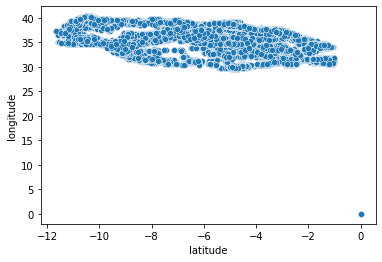

In [13]:
sns.scatterplot('latitude', 'longitude', data=df);

Looking at the scatter plot of the locational coordinates, we notice an outlier with a 0' 0' latitude and longitude which really doesn't make sense since these points are far off Tanzania. In this next step lets see how many of our data have these coordinates and drop them accordingly.

In [14]:
test = df.loc[df['longitude']==0, 'latitude'].value_counts()
test

-2.000000e-08    1812
Name: latitude, dtype: int64

In [15]:
to_drop = df.loc[(df['longitude']==0) & (df['latitude'] == -2.000000e-08)]
to_drop.shape

(1812, 34)

In [16]:
df.drop(to_drop.index, axis=0, inplace=True)

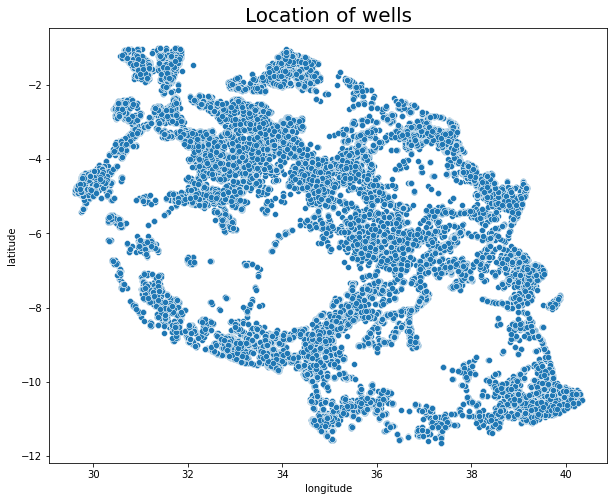

In [17]:
#plot longitude and latitude of Tanzania
fig = plt.figure(figsize=(10,8))
sns.scatterplot('longitude', 'latitude',  data=df)
plt.title('Location of wells', fontsize=20);

Now this looks much better. Check one last time to see if we have any missing values.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   funder                 57588 non-null  object 
 3   gps_height             57588 non-null  int64  
 4   installer              57588 non-null  object 
 5   longitude              57588 non-null  float64
 6   latitude               57588 non-null  float64
 7   wpt_name               57588 non-null  object 
 8   basin                  57588 non-null  object 
 9   region                 57588 non-null  object 
 10  region_code            57588 non-null  int64  
 11  district_code          57588 non-null  int64  
 12  lga                    57588 non-null  object 
 13  ward                   57588 non-null  object 
 14  population             57588 non-null  int64  
 15  re

## Explore

Now that our data is clean we will move on to the next step and merge the two tables to their corresponding ids inorder to label them according to their functionality.

### Merging Labels to the well ids

In [19]:
# Read csv file
df1 = pd.read_csv('training_set_labels.csv')
df1.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [20]:
# merge the two tables
df2 = pd.merge(df, df1, how = 'inner', left_on = ['id'], right_on = ['id'])
df2.shape

(57588, 35)

In [21]:
df2.status_group.value_counts()

functional                 31389
non functional             22268
functional needs repair     3931
Name: status_group, dtype: int64

### Visualization of features in relation to functionality

Text(0, 0.5, 'Number of wells')

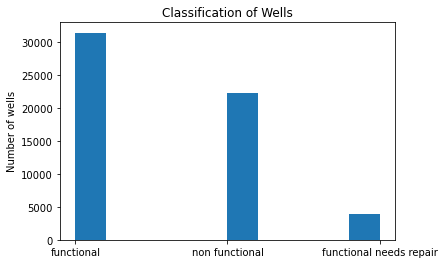

In [22]:
#plot number of wells according to functionality
plt.hist('status_group', data=df2);
plt.title('Classification of Wells')
plt.ylabel('Number of wells')

In [23]:
df2.status_group.value_counts(normalize=True)

functional                 0.545061
non functional             0.386678
functional needs repair    0.068261
Name: status_group, dtype: float64

We do see a class inbalance in the status group with 54.5% functional, 38.67% non functional,  6.82% functional needs repair.

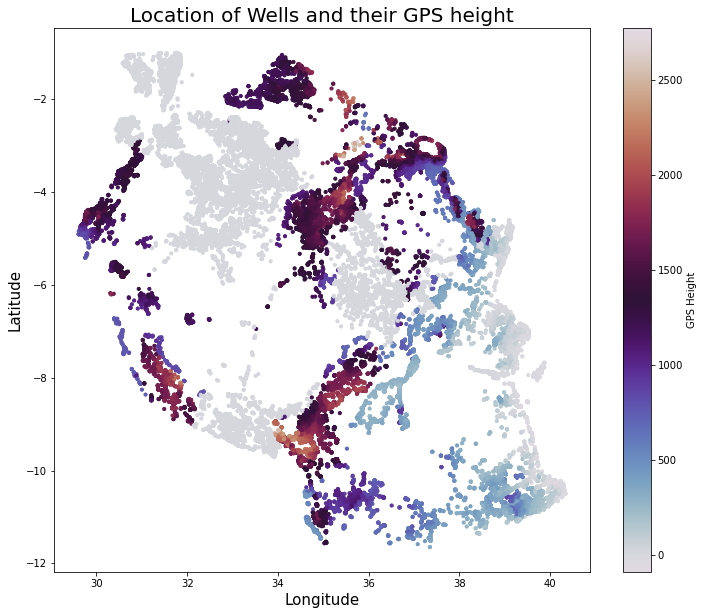

In [24]:
# plot wells on map with respect to water point height
plt.figure(figsize=(12,10))

plt.scatter(x='longitude', y='latitude', c='gps_height' , data=df2, s=10, cmap='twilight')
plt.colorbar().set_label('GPS Height')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Location of Wells and their GPS height', fontsize=20)

plt.show()


Expectedly, wells will low GPS height of their water point seem to be clustered around 'non functional' or 'functional needs repair' classes. We will take a look at those in the actual map below and try to see the relationship.

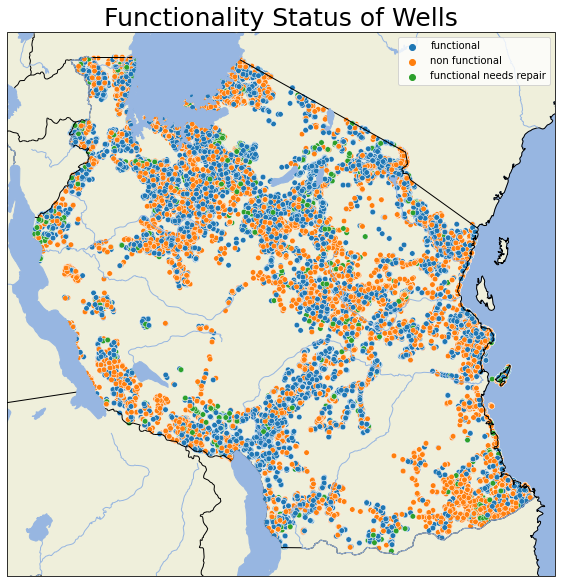

In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS, linestyle='-' )
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(df2['longitude'], df2['latitude'], 
            s=30,
            hue=df2['status_group'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Functionality Status of Wells', fontsize=25)
plt.legend()
plt.show()


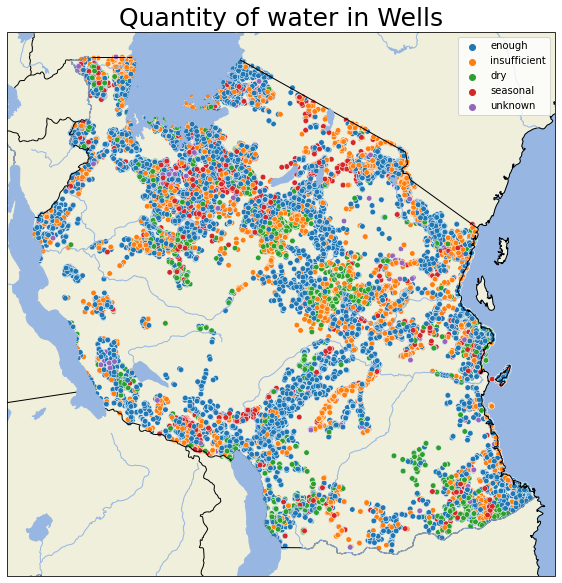

In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS)
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(df2['longitude'], df2['latitude'], 
            s=30,
            hue=df2['quantity'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Quantity of water in Wells', fontsize=25)
plt.legend()
plt.show()


In [27]:
df.amount_tsh.value_counts(normalize=True)

0.0         0.691585
500.0       0.053865
50.0        0.042926
1000.0      0.025839
20.0        0.025405
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

Majority of the wells (69%) have a total static head of 0, which could signify that they are dry. Since this data was recorded at a specific date though, this could mean that those wells are non functional or possibly seasonal and happened to be dry at the time of inspection.

In [27]:
payment = df2.groupby('status_group')['payment_type'].value_counts(normalize = True).unstack()

Text(0, 0.5, 'Percentage')

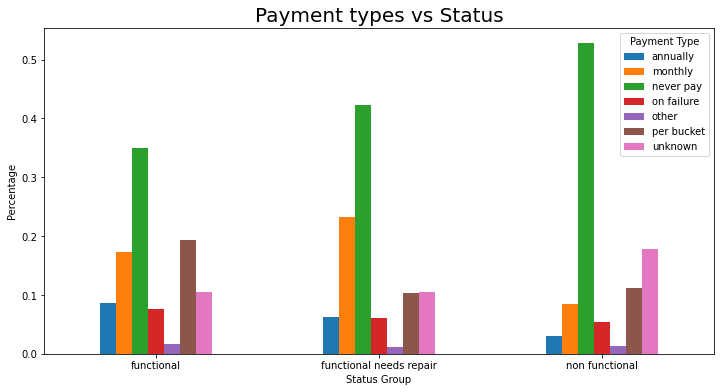

In [28]:
payment.plot.bar(figsize = (12, 6))
plt.xticks(rotation = 0)
plt.title('Payment types vs Status', fontsize=20)
plt.legend(title = 'Payment Type')
plt.xlabel('Status Group')
plt.ylabel('Percentage')

Let's keep plotting visualizations of different features with respect to status group of wells to understand the trend of the functionality of the those wells

In [29]:
quantity_df = df2.groupby('quantity')['status_group'].value_counts().unstack()

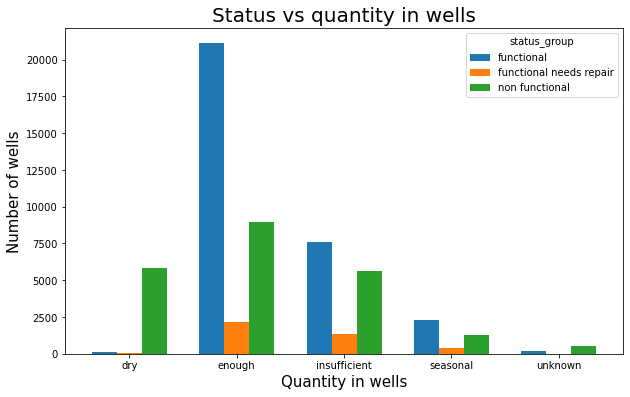

In [30]:
quantity_df.plot.bar(figsize = (10, 6), width=0.7)
plt.title('Status vs quantity in wells', fontsize=20)
plt.xlabel('Quantity in wells', fontsize=15)
plt.ylabel('Number of wells', fontsize=15)
plt.xticks(rotation = 0);

In [31]:
df2.quantity.value_counts(normalize=True)

enough          0.560186
insufficient    0.252900
dry             0.104015
seasonal        0.069476
unknown         0.013423
Name: quantity, dtype: float64

In [32]:
quantity_df = df2.groupby('water_quality')['status_group'].value_counts().unstack()

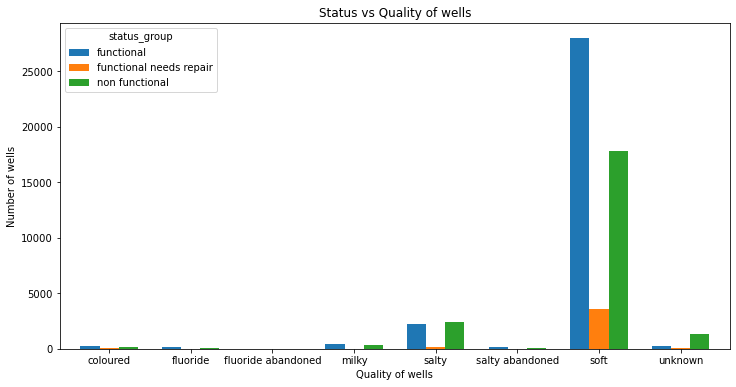

In [33]:
quantity_df.plot.bar(figsize = (12, 6), width=0.7)
plt.title('Status vs Quality of wells')
plt.xlabel('Quality of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 0);

In [34]:
quantity_df = df2.groupby('extraction_type_class')['status_group'].value_counts().unstack()

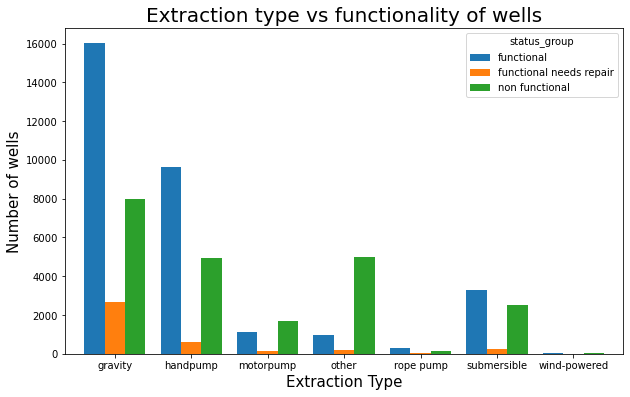

In [35]:
quantity_df.plot.bar(figsize = (10, 6), width=0.8)

plt.title('Extraction type vs functionality of wells', fontsize=(20))
plt.xlabel('Extraction Type', fontsize=15)
plt.ylabel('Number of wells', fontsize=15)
plt.xticks(rotation = 0);

Text(0.5, 0, 'Number of wells')

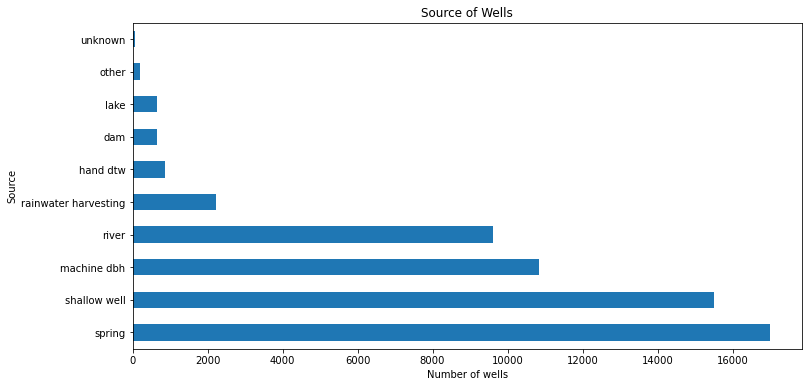

In [36]:
df2.source.value_counts().plot.barh(figsize = (12, 6))
plt.title('Source of Wells')
plt.ylabel('Source')
plt.xlabel('Number of wells')

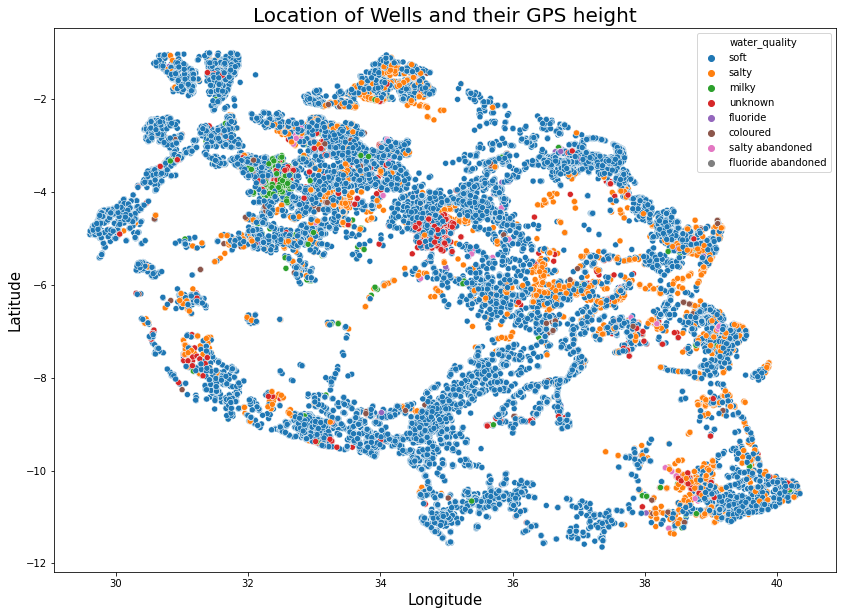

In [37]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='longitude', y='latitude', hue='water_quality' , data=df2)

plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Location of Wells and their GPS height', fontsize=20)

plt.show()


### Construction year

Construction year is an important feature for our modeling but we do have a large range of years which will be a huge number of columns when creating dummies. We will categorize the years in such a way that they will be parts of a 10 year time period to reduce the classes of this feature. Another point worth mentioning is that more than 30% of our data has no record of the construction year. Since this is an important feature and losing that much amount of data is not worth the risk we will take the option of replacing those values with random choice from the rest of the data.

In [38]:
df2.construction_year.value_counts(normalize=True)

0       0.328141
2010    0.045930
2008    0.045374
2009    0.043985
2000    0.036310
2007    0.027558
2006    0.025544
2003    0.022331
2011    0.021810
2004    0.019501
2012    0.018823
2002    0.018667
1978    0.018007
1995    0.017608
2005    0.017556
1999    0.017000
1998    0.016774
1990    0.016566
1985    0.016410
1980    0.014083
1996    0.014083
1984    0.013527
1982    0.012919
1994    0.012815
1972    0.012294
1974    0.011739
1997    0.011183
1992    0.011113
1993    0.010558
2001    0.009377
1988    0.009047
1983    0.008474
1975    0.007588
1986    0.007536
1976    0.007189
1970    0.007137
1991    0.005626
1989    0.005487
1987    0.005244
1981    0.004133
1977    0.003508
1979    0.003334
1973    0.003195
2013    0.003056
1971    0.002518
1960    0.001771
1967    0.001528
1963    0.001476
1968    0.001337
1969    0.001025
1964    0.000695
1962    0.000521
1961    0.000365
1965    0.000330
1966    0.000295
Name: construction_year, dtype: float64

In [39]:
df2['construction_year'] = df2['construction_year'].replace(0, np.nan)

In [40]:
#replace missing values with random choice
s = df2.construction_year.value_counts(normalize=True)
df2['const_year'] = df2['construction_year']
df2.loc[df2.construction_year.isna(), 'const_year'] = np.random.choice(s.index, p=s.values, size=df2.construction_year.isna().sum())

In [41]:
df2['const_year'].value_counts(normalize = True)

2008.0    0.067705
2010.0    0.067688
2009.0    0.065917
2000.0    0.053535
2007.0    0.041797
2006.0    0.037213
2003.0    0.033323
2011.0    0.032941
2004.0    0.028843
2012.0    0.027922
2002.0    0.027558
1978.0    0.026811
2005.0    0.026221
1995.0    0.025978
1999.0    0.025735
1998.0    0.024588
1990.0    0.024415
1985.0    0.024154
1980.0    0.020872
1996.0    0.020664
1984.0    0.020490
1982.0    0.019396
1994.0    0.019257
1972.0    0.018216
1974.0    0.017174
1992.0    0.016653
1997.0    0.016097
1993.0    0.015976
2001.0    0.014378
1983.0    0.013180
1988.0    0.013093
1986.0    0.011235
1975.0    0.011218
1970.0    0.010801
1976.0    0.010454
1991.0    0.008526
1989.0    0.008092
1987.0    0.007936
1981.0    0.006321
1977.0    0.005348
1979.0    0.005001
2013.0    0.004741
1973.0    0.004515
1971.0    0.003838
1960.0    0.002587
1967.0    0.002292
1968.0    0.002084
1963.0    0.002049
1969.0    0.001476
1964.0    0.001111
1962.0    0.000851
1961.0    0.000729
1965.0    0.

In [42]:
df2.drop('construction_year', axis=1, inplace=True)

Now that we will have replaced the missing values, next step would be to create bins for the years. The typical life expectancy of a water well is supposedly 65-100 years, and the life expectency of a water well pump is 10-15 years. We will bin the construction year column in such a way and then take a look at the visualizations.

In [43]:
norm = df2.const_year.value_counts()

In [44]:
norm = df2.groupby('const_year')['status_group'].value_counts().unstack()

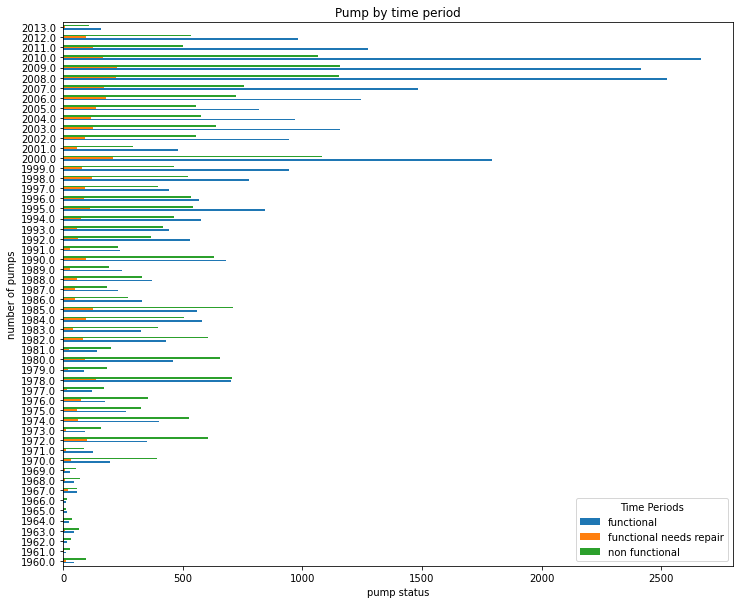

In [45]:

norm.plot.barh(figsize = (12, 10))
plt.title('Pump by time period')
plt.xlabel('pump status')
plt.ylabel('number of pumps')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Periods')

In [46]:
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
periods = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2015']

df2['construction_periods'] = pd.cut(df2['const_year'], bins ,
                                         labels = periods, right = False)

In [47]:
df2.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,region,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,const_year,construction_periods
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1999.0,1990-1999
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2010.0,2010-2015
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2009.0,2000-2009
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1986.0,1980-1989
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kagera,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1983.0,1980-1989


In [48]:
df2.construction_periods.value_counts()

2000-2009    22833
1990-1999    11396
1980-1989     8337
2010-2015     7676
1970-1979     6529
1960-1969      817
Name: construction_periods, dtype: int64

In [49]:

time_periods = df2.groupby('status_group')['construction_periods'].value_counts().unstack()
time_periods.head()


construction_periods,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2015
status_group,,,,,,
functional,291,2504,3657,6037,13821,5079
functional needs repair,64,523,635,792,1528,389
non functional,462,3502,4045,4567,7484,2208


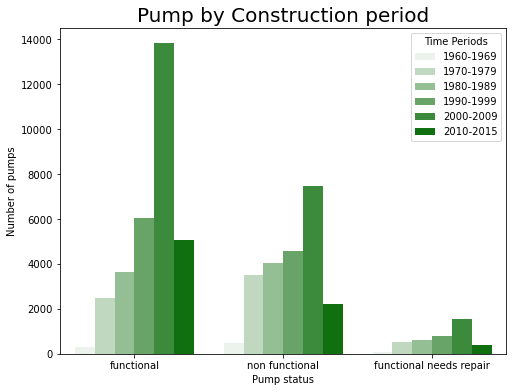

In [50]:
# sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(data=df2, x='status_group', hue='construction_periods', color='Green')

plt.title('Pump by Construction period', fontsize=20)
plt.xlabel('Pump status')
plt.ylabel('Number of pumps')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Periods')

In [51]:
df2.population.value_counts(normalize=True)

0       0.339810
1       0.121987
200     0.033688
150     0.032854
250     0.029190
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

The population column has more than 33% of its data to be 0 values and 12% of only 1 value. This information doesn't seem correct at all, better drop that feature. Some of the features are repetetive so we will just use the one with the most data and drop all the other similar features.

In [52]:
df2.drop(columns=['wpt_name', 'recorded_by', 'lga', 'ward',
                  'extraction_type', 'extraction_type_group', 'population', 
                  'management', 'payment_type', 'water_quality', 'source',
                  'source_class', 'waterpoint_type', 'quantity_group',
                  'region_code', 'const_year', 'district_code'], axis=1, inplace=True)

In [53]:
df2.shape

(57588, 19)

In [54]:
# Replace target values - there are three classes
df2 = df2.replace({'status_group': {'functional' : 1, 
                                'non functional' : 0, 
                                'functional needs repair' : 2}})
# Check to see that it worked
df2.iloc[15:20]

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,scheme_management,extraction_type_class,management_group,payment,quality_group,quantity,source_type,waterpoint_type_group,status_group,construction_periods
15,61848,0.0,Rudep,1645,DWE,31.444121,-8.274962,Lake Tanganyika,Rukwa,VWC,handpump,user-group,never pay,good,enough,borehole,hand pump,1,1990-1999
16,48451,500.0,Unicef,1703,DWE,34.642439,-9.106185,Rufiji,Iringa,WUA,gravity,user-group,pay monthly,good,dry,river/lake,communal standpipe,0,1970-1979
17,58155,0.0,Unicef,1656,DWE,34.569266,-9.085515,Rufiji,Iringa,WUA,gravity,user-group,pay when scheme fails,good,dry,river/lake,communal standpipe,0,1970-1979
18,34169,0.0,Hesawa,1162,DWE,32.920154,-1.947868,Lake Victoria,Mwanza,other,other,user-group,never pay,milky,insufficient,spring,other,2,1990-1999
19,18274,500.0,Danida,1763,Danid,34.508967,-9.894412,Lake Nyasa,Iringa,VWC,gravity,user-group,pay annually,good,enough,spring,communal standpipe,1,1990-1999


### Creating Dummies

In [55]:
target = ['status_group']

categorical = ['funder', 'installer', 'basin', 'region',
               'scheme_management', 'extraction_type_class', 'management_group', 'payment',
               'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
               'construction_periods']


continuous = ['amount_tsh', 'gps_height', 'longitude', 'latitude']

In [56]:
# print number of classes in each category
for col in categorical:
    print(col, df2[col].value_counts().count())

funder 1859
installer 2114
basin 9
region 21
scheme_management 13
extraction_type_class 7
management_group 5
payment 7
quality_group 6
quantity 5
source_type 7
waterpoint_type_group 6
construction_periods 6


In [57]:
categories_to_remove = {}
for col in categorical:
    df_tmp = pd.DataFrame(df2[col].value_counts(normalize=True))
    other_categories = list(df_tmp.loc[df_tmp[col]<0.01].index)
    df2[col] = df2[col].map(lambda x: 'other' if x in other_categories else x)
    categories_to_remove[col] = other_categories

In [58]:
# checking if our features of less than 1% are replaced
for col in categorical:
    print(df2[col].value_counts(normalize=True), '\n', df2[col].value_counts(normalize=True).count(), '\n')

other                     0.527593
Government Of Tanzania    0.153539
Danida                    0.054074
Hesawa                    0.033236
World Bank                0.023356
Kkkt                      0.022348
World Vision              0.021254
Rwssp                     0.020612
Unicef                    0.017972
District Council          0.014638
Tasaf                     0.014482
Dhv                       0.014395
Private Individual        0.014309
0                         0.013492
Norad                     0.013284
Germany Republi           0.010592
Tcrs                      0.010454
Ministry Of Water         0.010245
Water                     0.010124
Name: funder, dtype: float64 
 19 

other                 0.554959
DWE                   0.282264
Government            0.028999
RWE                   0.020508
Commu                 0.018407
DANIDA                0.018233
KKKT                  0.015576
Hesawa                0.013944
0                     0.013492
TCRS                

In [59]:
df2.drop(target , axis=1).columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'scheme_management',
       'extraction_type_class', 'management_group', 'payment', 'quality_group',
       'quantity', 'source_type', 'waterpoint_type_group',
       'construction_periods'],
      dtype='object')

In [60]:
df_dummies = pd.get_dummies(df2.drop(target, axis=1))
df_dummies.head().sort_values(by='id')

,id,amount_tsh,gps_height,longitude,latitude,funder_0,funder_Danida,funder_Dhv,funder_District Council,funder_Germany Republi,...,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,construction_periods_1960-1969,construction_periods_1970-1979,construction_periods_1980-1989,construction_periods_1990-1999,construction_periods_2000-2009,construction_periods_2010-2015
1,8776,0.0,1399,34.698766,-2.147466,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,19728,0.0,0,31.130847,-1.825359,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,67743,0.0,263,38.486161,-11.155298,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
0,69572,6000.0,1390,34.938093,-9.856322,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [61]:
df_dummies.shape

(57588, 119)

The next step would be to concatinate the Target features with the dummies.

In [62]:
df_dummies['status_group'] = df2['status_group'].values

In [63]:
df_dummies.shape

(57588, 120)

## Modeling


Here, we will run some Models using the classification algorithms of KNN, Random Forest and XGBoost. First we will run baseline models in each method and then move on to tunning and optimizing those models to increase performance and metric scores. I will use F1-score as my deciding metric, but precision and recall will let us know what values we're having trouble classifying, and where I can improve.

In [64]:
# assign variables for features and target 
X = df_dummies.drop('status_group', axis = 1)
y = df_dummies['status_group']

In [65]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [66]:
len(y_test)

11518

In [67]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics


## KNN 

The KNN model is simple to fit, but time-consuming to predict on, especially on this large dataset. It also has relatively few hyperparameters to tune, so it may not improve much.

### Baseline Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors Baseline'
models.append(metrics)

In [69]:
print(classification_report(y_train, knn.predict(X_train), 
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

               precision    recall  f1-score   support

nonfunctional       0.61      0.65      0.63     17842
   functional       0.71      0.77      0.74     25088
 needs repair       0.62      0.04      0.07      3140

     accuracy                           0.67     46070
    macro avg       0.65      0.48      0.48     46070
 weighted avg       0.67      0.67      0.65     46070



In [70]:
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

[[2096 2308   22]
 [2433 3843   25]
 [ 317  468    6]]
              precision    recall  f1-score   support

           0       0.43      0.47      0.45      4426
           1       0.58      0.61      0.59      6301
           2       0.11      0.01      0.01       791

    accuracy                           0.52     11518
   macro avg       0.38      0.36      0.35     11518
weighted avg       0.49      0.52      0.50     11518



### Confusion matrix

<Figure size 432x360 with 0 Axes>

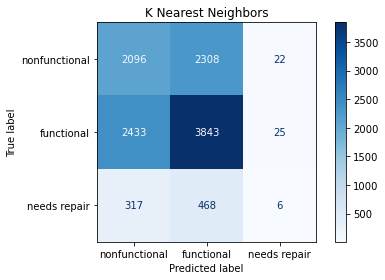

In [71]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, 
                      display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                                      cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

In this KNN our model was able to capture 47% of the non functional, 61% of the functional, and only 1% of the functional needs repair.

### Standardizing 

First scale the data. We scale the data after splitting the train and test data to avoid data leakage.

In [72]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,id,amount_tsh,gps_height,longitude,latitude,funder_0,funder_Danida,funder_Dhv,funder_District Council,funder_Germany Republi,...,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,construction_periods_1960-1969,construction_periods_1970-1979,construction_periods_1980-1989,construction_periods_1990-1999,construction_periods_2000-2009,construction_periods_2010-2015
0,1.273710,2.393683,1.172595,0.057318,-1.376628,-0.11822,-0.240045,-0.120373,-0.122854,-0.102501,...,0.822640,-0.624798,-0.115259,-0.351066,-0.120465,-0.35774,-0.411231,2.012017,-0.810528,-0.391692
1,-1.251616,-0.104170,1.035817,-0.205919,0.330106,-0.11822,-0.240045,-0.120373,-0.122854,-0.102501,...,-1.215599,1.600517,-0.115259,-0.351066,-0.120465,-0.35774,-0.411231,-0.497014,1.233763,-0.391692
2,-0.368808,-0.104170,0.474307,0.603923,0.441211,-0.11822,-0.240045,-0.120373,-0.122854,-0.102501,...,0.822640,-0.624798,-0.115259,-0.351066,-0.120465,-0.35774,-0.411231,-0.497014,1.233763,-0.391692
3,-1.426384,-0.104170,-0.994257,-1.321809,1.661788,-0.11822,-0.240045,-0.120373,-0.122854,-0.102501,...,0.822640,-0.624798,-0.115259,-0.351066,-0.120465,-0.35774,-0.411231,2.012017,-0.810528,-0.391692
4,0.708950,-0.104170,0.838569,-1.917170,0.502559,-0.11822,-0.240045,-0.120373,-0.122854,-0.102501,...,0.822640,-0.624798,-0.115259,-0.351066,-0.120465,-0.35774,-0.411231,2.012017,-0.810528,-0.391692


Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy.

In [73]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

### Optimazing k-value

Let's first create a function to iterate over a range of K-values to find out the best value for the optimum f1-score. Then pass that value for the first round of the GridSearchCV and take note of the result. In the second round of the GridSearchCV, we will try and narrow down the values around the successful ones already found in the first pass.

### Grid search CV

In [74]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))    


In [75]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 7
F1-Score: 0.7448219954222326


In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [30, 40], 'n_neighbors': [1, 5, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [78]:
grid_search.best_params_

{'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [79]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

In [80]:
print(classification_report(y_train, knn_tuned.predict(scaled_data_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

               precision    recall  f1-score   support

nonfunctional       1.00      1.00      1.00     17842
   functional       1.00      1.00      1.00     25088
 needs repair       1.00      1.00      1.00      3140

     accuracy                           1.00     46070
    macro avg       1.00      1.00      1.00     46070
 weighted avg       1.00      1.00      1.00     46070



In [81]:
print(confusion_matrix(y_test, knn_tuned.predict(scaled_data_test)))
print(classification_report(y_test, knn_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3155 1179   92]
 [ 753 5352  196]
 [ 161  413  217]]
               precision    recall  f1-score   support

nonfunctional       0.78      0.71      0.74      4426
   functional       0.77      0.85      0.81      6301
 needs repair       0.43      0.27      0.33       791

     accuracy                           0.76     11518
    macro avg       0.66      0.61      0.63     11518
 weighted avg       0.75      0.76      0.75     11518



In [82]:
# Second round of GridSearchCV selection of parameters
param_grid = {
    'n_neighbors': [8, 9, 10], # default 5
#     'leaf_size': [30] # default 30  
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [8, 9, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='f1_macro',
             verbose=0)

In [83]:
grid_search.best_params_

{'n_neighbors': 9}

Since we don't see any change in the parameters selection we are going to keep our first trial and proceed to the next step.

In [84]:
print(confusion_matrix(y_test, knn_tuned.predict(scaled_data_test)))
print(classification_report(y_test, knn_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3155 1179   92]
 [ 753 5352  196]
 [ 161  413  217]]
               precision    recall  f1-score   support

nonfunctional       0.78      0.71      0.74      4426
   functional       0.77      0.85      0.81      6301
 needs repair       0.43      0.27      0.33       791

     accuracy                           0.76     11518
    macro avg       0.66      0.61      0.63     11518
 weighted avg       0.75      0.76      0.75     11518



### Confusion Matrix

In [85]:
from sklearn.metrics import plot_confusion_matrix

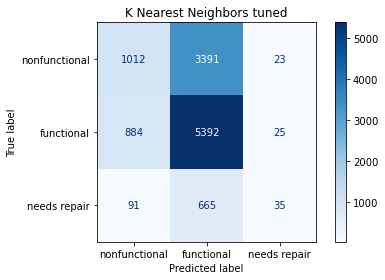

In [86]:
plot_confusion_matrix(knn_tuned, X_test, y_test, 
                      display_labels=['nonfunctional','functional','needs repair'],
                                       values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors tuned')
plt.tight_layout()

plt.show()

From the confusion matrix we can conclude that using the Grid search CV tunning method our model was able to predict:

**Non functional**
- 120 True positives 
- (45+6) = 51 False positives
- (2300+75) = 2375 False negatives
- (3900+33+460+8) = 6947 True Negatives

**Functional**
- 3900 True positives
- (2300+460) = 2760 False positives
- (45+33) = 78 False negatives
- (120+75+6+8) = 209 True negatives

**Needs Repair**
- 8 True positives
- (75+33) = 108 False positive
- (460+6) = 466 False negative
- (120+2300+3900+45) = 6365 True Negative

Since we are more interested in less False positives especially for identifying the 'nonfunctional' and 'needs repair' wells, our KNN model seems to have done better than the baseline model. It still looks like it needs some more work done at correctly classifying the 'needs repair' class, but this could also be due to the fact that the classes 'nonfunctional' and 'needs repair' have more or less similar features affecting their functionality. 

We'll try another optimizing technique and see how well our KNN model would perform.

### Smote

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_data_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

1    31389
0    22268
2     3931
Name: status_group, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    25088
1    25088
0    25088
Name: status_group, dtype: int64


In [89]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [90]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

               precision    recall  f1-score   support

nonfunctional       1.00      1.00      1.00     25088
   functional       1.00      1.00      1.00     25088
 needs repair       1.00      1.00      1.00     25088

     accuracy                           1.00     75264
    macro avg       1.00      1.00      1.00     75264
 weighted avg       1.00      1.00      1.00     75264



In [91]:
print(confusion_matrix(y_test, knn_smote.predict(scaled_data_test)))
print(classification_report(y_test, knn_smote.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3158  952  316]
 [ 806 4778  717]
 [ 144  260  387]]
               precision    recall  f1-score   support

nonfunctional       0.77      0.71      0.74      4426
   functional       0.80      0.76      0.78      6301
 needs repair       0.27      0.49      0.35       791

     accuracy                           0.72     11518
    macro avg       0.61      0.65      0.62     11518
 weighted avg       0.75      0.72      0.73     11518



### Confusion Matrix

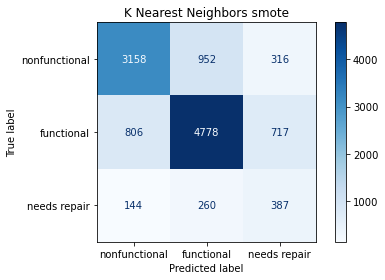

In [92]:
plot_confusion_matrix(knn_smote, scaled_data_test, y_test, 
                      display_labels=['nonfunctional','functional',
                                      'needs repair'],
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()


The K Nearest Neighbors model performed better after hyperparameter tunning in regards to Accuracy(74%) and F1 score, but didn't improve significantly with smote. The F1 score of (75%, 80%, 38%) show that there is a class imbalance and hence its effect is visible. But generally KNN also takes in incredibly long time to run on this large dataset, making it impractical to tune further.
The model was generally able to capture the following percentiles of the actual wells.


**K Nearest Neighbor:** 

   1. Baseline model
    
    Non functional  (47%)     
    Functional      (61%)   
    Functional needs repair  (1%) 
    
    
   2. Gridsearch CV
    
    Non functional  (71%)     
    Functional      (84%)   
    Functional needs repair  (27%)
    
    
   3. SMOTE
    
    Non functional  (71%)     
    Functional      (76%)   
    Functional needs repair  (41%)

## Random forest

### Baseline Model

In [93]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest Baseline'
models.append(metrics)

In [94]:
print(classification_report(y_train, forest.predict(X_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

               precision    recall  f1-score   support

nonfunctional       1.00      1.00      1.00     17842
   functional       1.00      1.00      1.00     25088
 needs repair       1.00      1.00      1.00      3140

     accuracy                           1.00     46070
    macro avg       1.00      1.00      1.00     46070
 weighted avg       1.00      1.00      1.00     46070



In [95]:
print(confusion_matrix(y_test, forest.predict(X_test)))
print(classification_report(y_test, forest.predict(X_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3411  944   71]
 [ 584 5550  167]
 [ 139  426  226]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.77      0.80      4426
   functional       0.80      0.88      0.84      6301
 needs repair       0.49      0.29      0.36       791

     accuracy                           0.80     11518
    macro avg       0.70      0.65      0.67     11518
 weighted avg       0.79      0.80      0.79     11518



### Confusion matrix

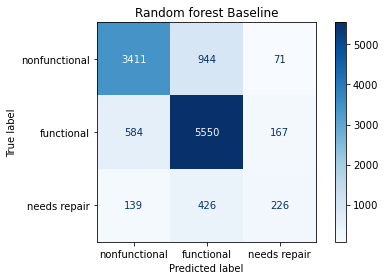

In [96]:
plot_confusion_matrix(forest, X_test, y_test, 
                     display_labels=['nonfunctional', 'functional',
                                     'needs repair'], values_format='d', 
                                      cmap=plt.cm.Blues)
plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

### Standardized

In [97]:
# Instantiate RandomForestClassifier
forest = RandomForestClassifier()
# Fit the classifier
forest.fit(scaled_data_train, y_train);


# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, forest)
metrics['name'] = 'Random forest scaled'
models.append(metrics)


### GridSearch CV

In [98]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [99]:
grid_search.best_params_

{'max_depth': 35, 'max_features': 60, 'n_estimators': 200}

In [100]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned1'
models.append(metrics)

In [101]:
print(confusion_matrix(y_test, forest_tuned.predict(scaled_data_test)))
print(classification_report(y_test, forest_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3019 1395   12]
 [ 485 5789   27]
 [ 144  563   84]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.68      0.75      4426
   functional       0.75      0.92      0.82      6301
 needs repair       0.68      0.11      0.18       791

     accuracy                           0.77     11518
    macro avg       0.75      0.57      0.59     11518
 weighted avg       0.77      0.77      0.75     11518



In [102]:
param_grid = {
    'n_estimators': [150, 200], # default 100
    'max_depth': [35, 45, 50], # default None
    'max_features': [55, 60, 65],
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35 
# we assume 5 would be the min sample leaf and avoid further search    
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [103]:
grid_search.best_params_

{'max_depth': 50, 'max_features': 55, 'n_estimators': 200}

In [104]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=50,
                                      max_features=55, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned2'
models.append(metrics)

In [105]:
print(confusion_matrix(y_test, forest_tuned.predict(scaled_data_test)))
print(classification_report(y_test, forest_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3012 1401   13]
 [ 483 5790   28]
 [ 141  566   84]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.68      0.75      4426
   functional       0.75      0.92      0.82      6301
 needs repair       0.67      0.11      0.18       791

     accuracy                           0.77     11518
    macro avg       0.75      0.57      0.58     11518
 weighted avg       0.77      0.77      0.75     11518



### Confusion matrix

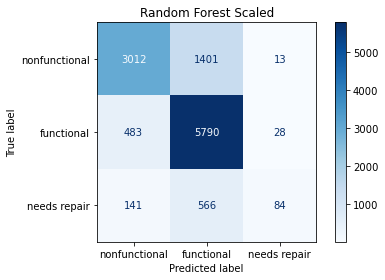

In [106]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, 
                     display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

### Smote

In [107]:
forest_smote = RandomForestClassifier(n_estimators=150, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

In [108]:
print(confusion_matrix(y_test, forest_smote.predict(scaled_data_test)))
print(classification_report(y_test, forest_smote.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3073  992  361]
 [ 542 4992  767]
 [  88  262  441]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.69      0.76      4426
   functional       0.80      0.79      0.80      6301
 needs repair       0.28      0.56      0.37       791

     accuracy                           0.74     11518
    macro avg       0.64      0.68      0.64     11518
 weighted avg       0.78      0.74      0.75     11518



### Confusion matrix

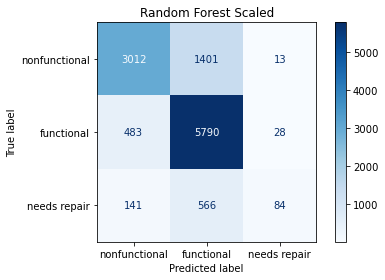

In [109]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, 
                      display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

Our Random Forest model has been able to correctly classify 5,353 data sets out of 6,837 which is 78% of our total data.

# Feature importance

Text(0, 0.5, 'Features')

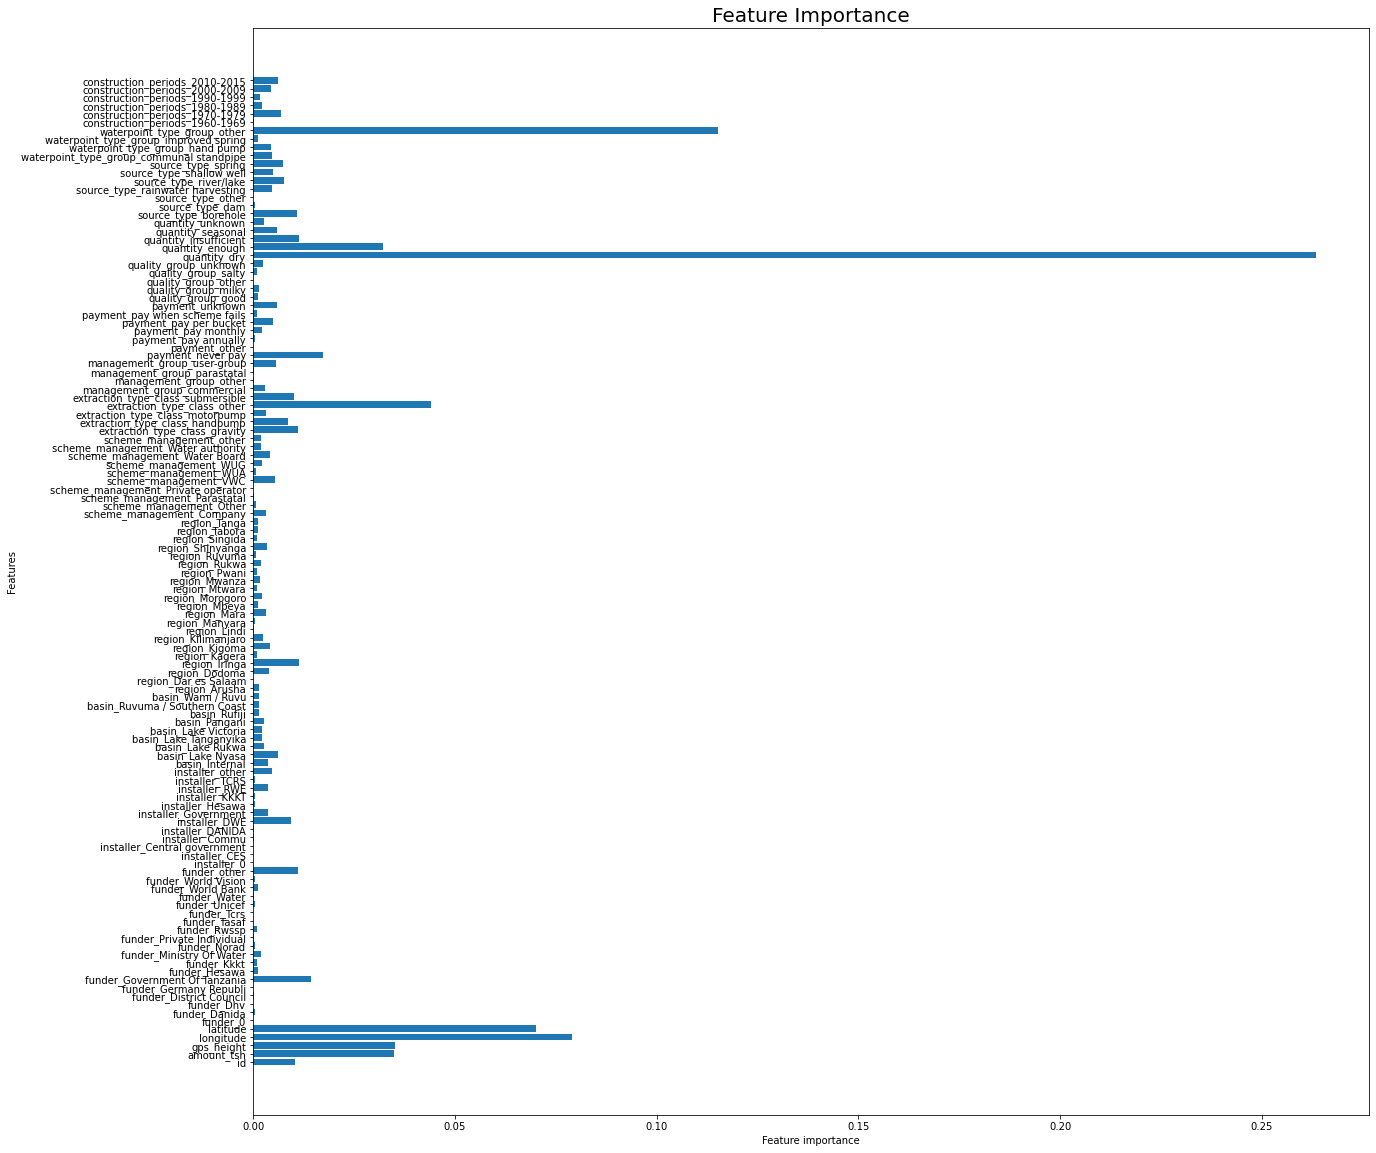

In [110]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest_tuned.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

## XGBoost

### Baseline Model

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
metrics['name'] = 'XG Boost Baseline'
models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:27:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [112]:
print(classification_report(y_train, xgb.predict(X_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

               precision    recall  f1-score   support

nonfunctional       0.89      0.77      0.82     17842
   functional       0.80      0.95      0.87     25088
 needs repair       0.85      0.31      0.46      3140

     accuracy                           0.83     46070
    macro avg       0.85      0.68      0.72     46070
 weighted avg       0.84      0.83      0.82     46070



In [113]:
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3169 1218   39]
 [ 515 5733   53]
 [ 125  509  157]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.72      0.77      4426
   functional       0.77      0.91      0.83      6301
 needs repair       0.63      0.20      0.30       791

     accuracy                           0.79     11518
    macro avg       0.74      0.61      0.63     11518
 weighted avg       0.78      0.79      0.77     11518



### Confusion Matrix

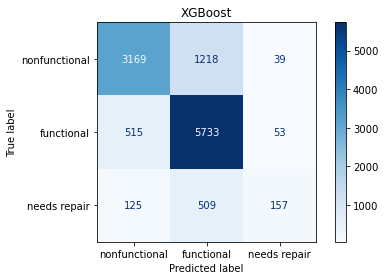

In [114]:
plot_confusion_matrix(xgb, X_test, y_test, 
                     display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

### Standardized

In [115]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost_scaled'
models.append(metrics)

[03:28:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Grid search CV

In [116]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 150, 200],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:28:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:28:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:28:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:29:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[03:42:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:42:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:43:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:43:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[09:43:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:43:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:43:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:44:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[10:04:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[10:18:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[10:39:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=N

In [117]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}

In [118]:
# Instantiate XGBClassifier and fit classifier

xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.7)
xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)

[10:53:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [119]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

               precision    recall  f1-score   support

nonfunctional       0.96      0.88      0.92     17842
   functional       0.89      0.98      0.93     25088
 needs repair       0.96      0.64      0.77      3140

     accuracy                           0.92     46070
    macro avg       0.94      0.83      0.87     46070
 weighted avg       0.92      0.92      0.92     46070



In [120]:
print(confusion_matrix(y_test, xgb_tuned.predict(scaled_data_test)))
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3281 1100   45]
 [ 515 5701   85]
 [ 137  466  188]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.74      0.79      4426
   functional       0.78      0.90      0.84      6301
 needs repair       0.59      0.24      0.34       791

     accuracy                           0.80     11518
    macro avg       0.74      0.63      0.65     11518
 weighted avg       0.79      0.80      0.78     11518



In [121]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [10,15,20],
    'subsample': [0.6, 0.7],
    'n_estimators': [200, 250],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:56:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[11:34:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:36:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:34:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[13:19:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=N

In [122]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.7}

In [123]:
# Instantiate XGBClassifier and fit classifier

xgb_tuned = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=15,
                          subsample=0.5)
xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned2'
models.append(metrics)

[14:03:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
print(confusion_matrix(y_test, xgb_tuned.predict(scaled_data_test)))
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3318 1066   42]
 [ 529 5685   87]
 [ 136  469  186]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.75      0.79      4426
   functional       0.79      0.90      0.84      6301
 needs repair       0.59      0.24      0.34       791

     accuracy                           0.80     11518
    macro avg       0.74      0.63      0.66     11518
 weighted avg       0.79      0.80      0.79     11518



### Confusion matrix

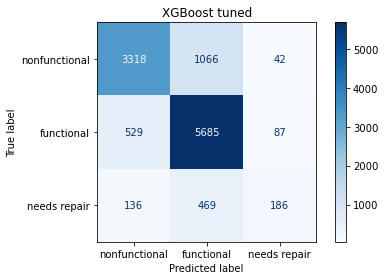

In [125]:
plot_confusion_matrix(xgb_tuned, scaled_data_test, y_test, 
                      display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d',
                      cmap=plt.cm.Blues)
plt.title('XGBoost tuned')
plt.tight_layout()

plt.show()

### Smote

In [126]:
# Instantiate XGBClassifier and fit classifier
xgb_smote = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.7)
xgb_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'XGBoost_smote'
models.append(metrics)

[14:04:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [127]:
print(confusion_matrix(y_test, xgb_smote.predict(scaled_data_test)))
print(classification_report(y_test, xgb_smote.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

[[3301  940  185]
 [ 577 5331  393]
 [ 115  336  340]]
               precision    recall  f1-score   support

nonfunctional       0.83      0.75      0.78      4426
   functional       0.81      0.85      0.83      6301
 needs repair       0.37      0.43      0.40       791

     accuracy                           0.78     11518
    macro avg       0.67      0.67      0.67     11518
 weighted avg       0.78      0.78      0.78     11518



### Confusion matrix

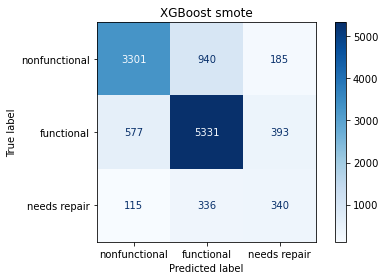

In [128]:
plot_confusion_matrix(xgb_smote, scaled_data_test, y_test, 
                      display_labels=['nonfunctional', 'functional', 
                                          'needs repair'], values_format='d',
                      cmap=plt.cm.Blues)
plt.title('XGBoost smote')
plt.tight_layout()

plt.show()

## Analysis

## Conclusion & Recommendation

The overall best model was Random Forrest which performed considerably better than other models at predicting which wells were functional but need repair.(Recall score)

**Random forest:** 

   1. Baseline model
    
    Non functional  (77%)     
    Functional      (87%)   
    Functional needs repair  (29%) 
    
    
   2. Gridsearch CV
    
    Non functional  (68%)     
    Functional      (92%)   
    Functional needs repair  (10%)
    
    
   3. SMOTE
    
    Non functional  (69%)     
    Functional      (79%)   
    Functional needs repair  (55%)

 Given more time and with some more tunning it may be able to increase its performance.

## Further Study

1. Identify and indicate wells that are no longer functional due to being past their life span.

2. Review which extraction types last longer in supply and quality of water.

3. Identify companies with a record of poor installation, and lack of maintenance.

4. Include date records of maintenance, accurate population size and Construction year.